In [1]:
!pip install -qqq git+https://github.com/huggingface/diffusers.git
!pip install -q accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━

In [1]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe = pipe.to(device)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [2]:
pipe.enable_attention_slicing()
pipe.enable_xformers_memory_efficient_attention()

In [3]:
seed = 777

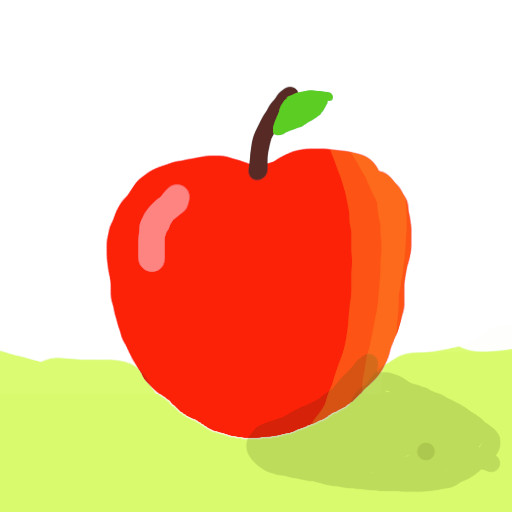

In [4]:
from PIL import Image
init_img = Image.open('/content/apple.jpg')
init_img.thumbnail((512, 512))
init_img

In [2]:
prompt = 'photograph of an apple'

  0%|          | 0/40 [00:00<?, ?it/s]

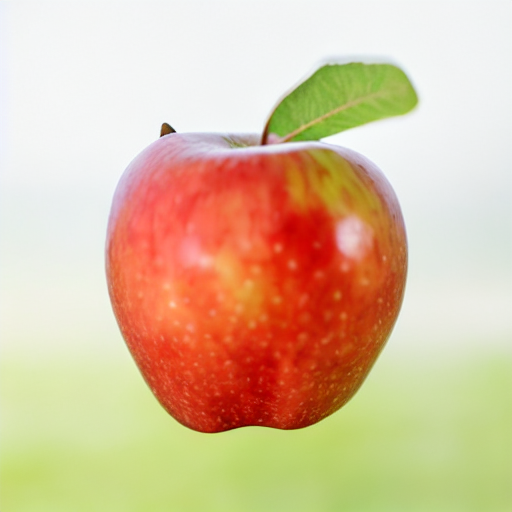

In [8]:
generator = torch.Generator(device = device).manual_seed(seed)
img = pipe(prompt = prompt, image = init_img, generator = generator).images[0]
img

  0%|          | 0/40 [00:00<?, ?it/s]

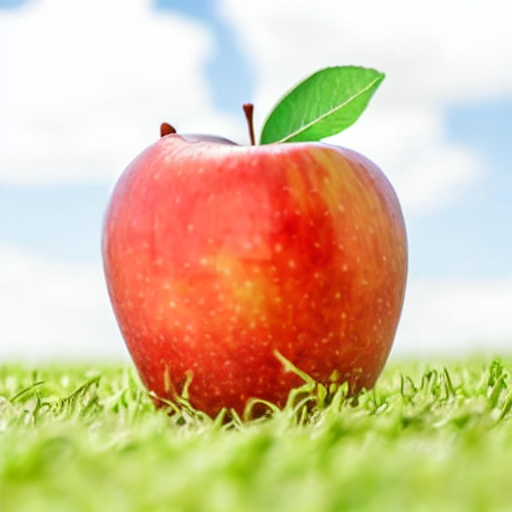

In [9]:
prompt = "photograph of an apple on a grass field, blue sky and clouds in the background"
generator = torch.Generator(device=device).manual_seed(seed)
img = pipe(prompt=prompt, image=init_img, generator=generator).images[0]
img

  0%|          | 0/40 [00:00<?, ?it/s]

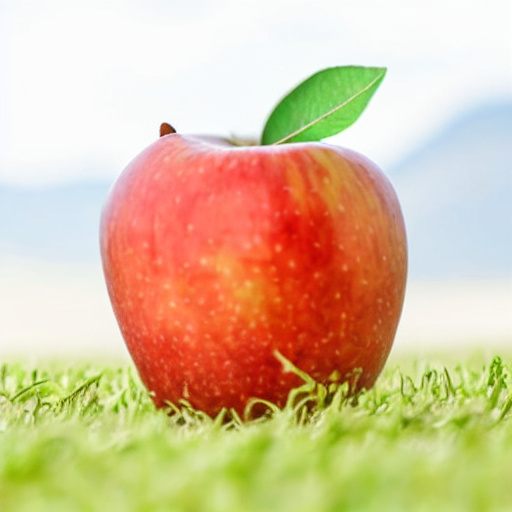

In [10]:
prompt = "photograph of an apple on a grass field, mountains in the background"
generator = torch.Generator(device=device).manual_seed(seed)
img = pipe(prompt=prompt, image=init_img, generator=generator).images[0]
img

  0%|          | 0/40 [00:00<?, ?it/s]

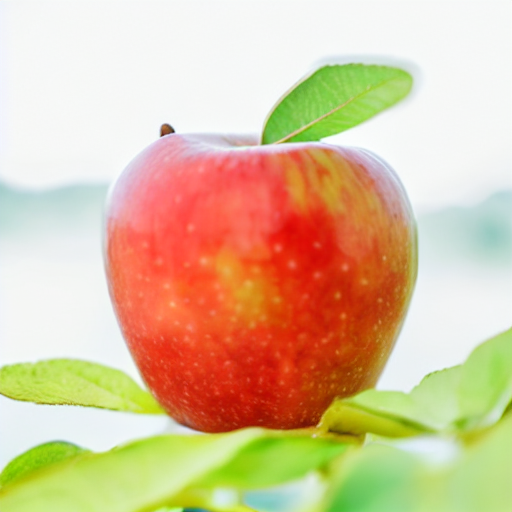

In [11]:
prompt = "photograph of an apple on a river"
generator = torch.Generator(device=device).manual_seed(seed)
img = pipe(prompt=prompt, image=init_img, generator=generator).images[0]
img

  0%|          | 0/42 [00:00<?, ?it/s]

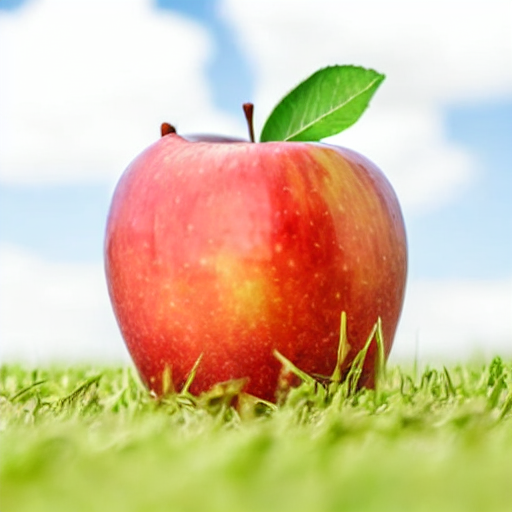

In [12]:
prompt = "photograph of an apple on a grass field, blue sky and clouds in the background"
generator = torch.Generator(device=device).manual_seed(seed)
img = pipe(prompt = prompt, image=init_img, strength=0.85, generator=generator).images[0]
img

  0%|          | 0/42 [00:00<?, ?it/s]

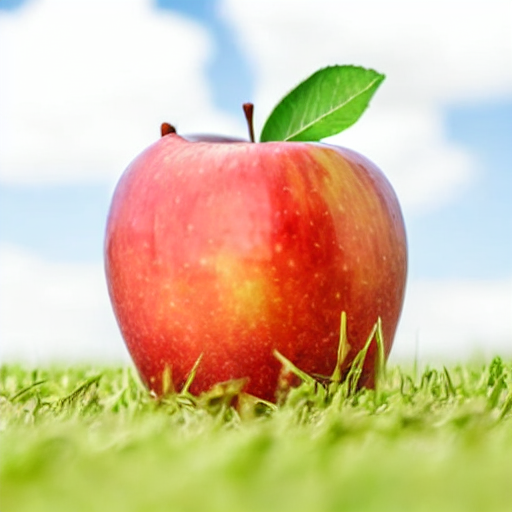

In [13]:
prompt = "photograph of an apple on a grass field, blue sky and clouds in the background"
generator = torch.Generator(device=device).manual_seed(seed)
img = pipe(prompt = prompt, image=init_img, strength=0.85, generator=generator).images[0]
img

  0%|          | 0/37 [00:00<?, ?it/s]

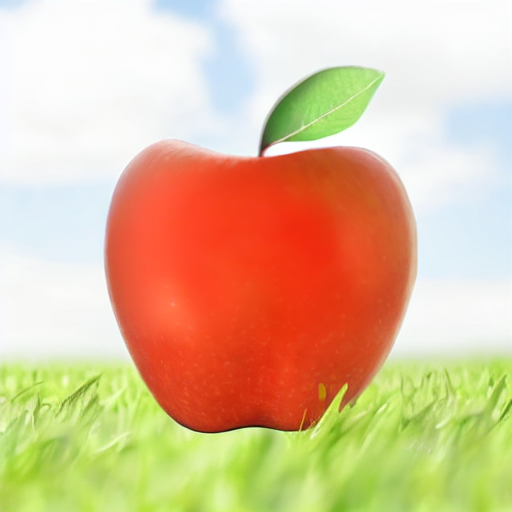

In [14]:
generator = torch.Generator(device=device).manual_seed(seed)
img = pipe(prompt=prompt, image=init_img, strength=0.75, generator=generator).images[0]
img

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

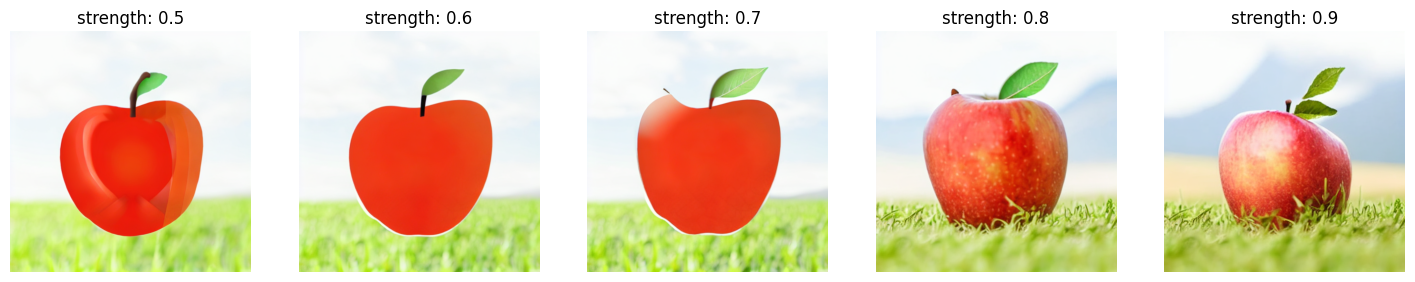

In [15]:
import matplotlib.pyplot as plt

prompt = "photograph of an apple on a grass field, mountains in the background"

plt.figure(figsize=(18,8))
for i in range(1, 6):

  strength_val = (i + 4) / 10
  generator = torch.Generator("cuda").manual_seed(seed)
  img = pipe(prompt, image=init_img, strength=strength_val, generator=generator).images[0]

  plt.subplot(1,5,i)
  plt.title('strength: {}'.format(strength_val))
  plt.imshow(img)
  plt.axis('off')

plt.show()

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

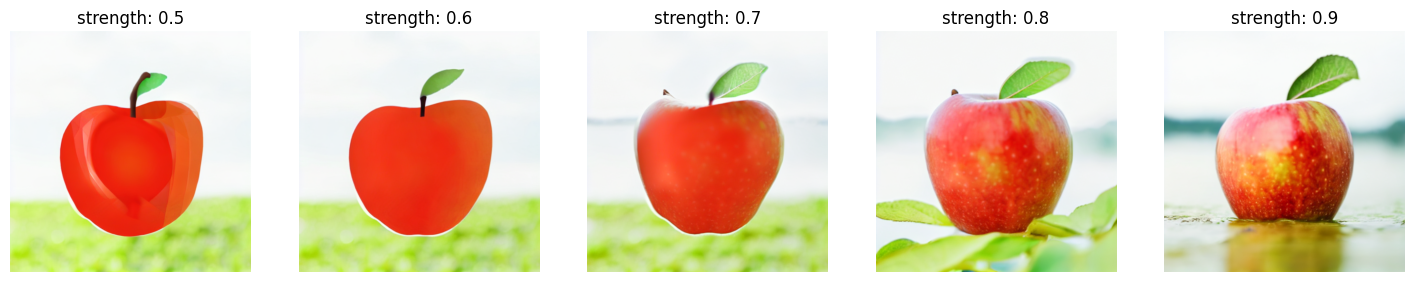

In [16]:
import matplotlib.pyplot as plt

prompt = "photograph of an apple on a river"

plt.figure(figsize=(18,8))
for i in range(1, 6):

  strength_val = (i + 4) / 10
  generator = torch.Generator("cuda").manual_seed(seed)
  img = pipe(prompt, image=init_img, strength=strength_val, generator=generator).images[0]

  plt.subplot(1,5,i)
  plt.title('strength: {}'.format(strength_val))
  plt.imshow(img)
  plt.axis('off')

plt.show()

## OTHER MODELS

In [5]:
modi = StableDiffusionImg2ImgPipeline.from_pretrained("nitrosocke/mo-di-diffusion", torch_dtype=torch.float16)
modi = modi.to("cuda")

text_encoder/model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/45 [00:00<?, ?it/s]

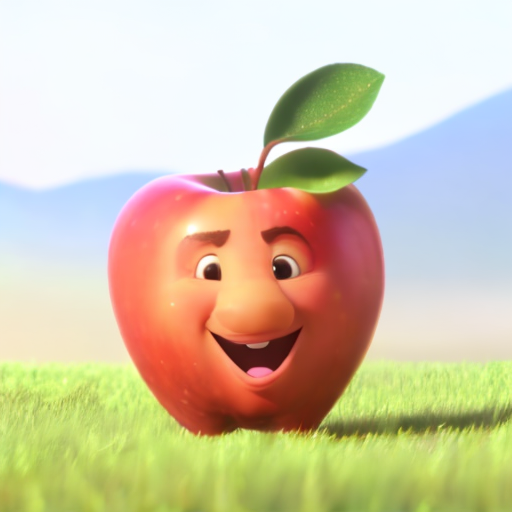

In [10]:
bayc_img = Image.open('/content/apple.jpg')
bayc_img.thumbnail((512, 512))
bayc_img
prompt = "modern disney style apple, mountains in the background"
generator = torch.Generator(device=device).manual_seed(seed)
image = modi(prompt=prompt, image=init_img, strength=0.9, guidance_scale=7.5, generator=generator).images[0]
image

In [11]:
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

instruct = StableDiffusionInstructPix2PixPipeline.from_pretrained("timbrooks/instruct-pix2pix", torch_dtype=torch.float16, safety_checker=None)

instruct.to("cuda")
instruct.scheduler = EulerAncestralDiscreteScheduler.from_config(instruct.scheduler.config)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

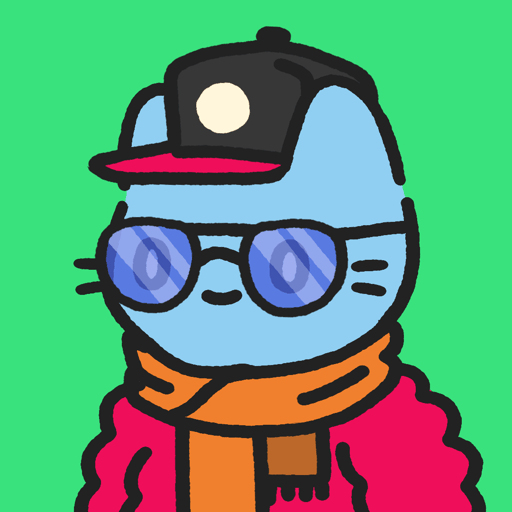

In [62]:
init_img = Image.open("/content/ coolio.png").convert("RGB")
init_img.thumbnail((512, 512))
init_img

  0%|          | 0/50 [00:00<?, ?it/s]

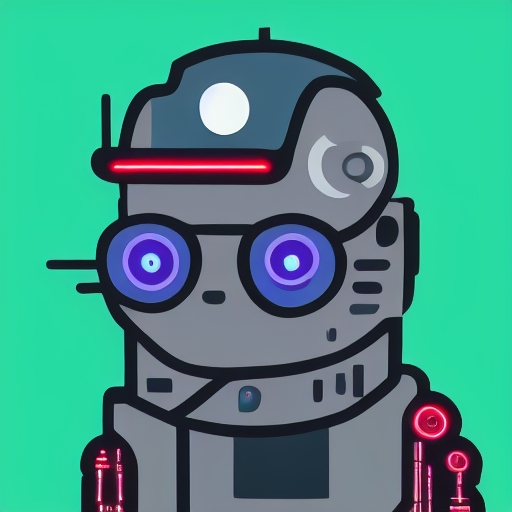

In [39]:
prompt = "turn into a cyborg"
generator = torch.Generator(device=device).manual_seed(122331121)
result_img = instruct(prompt, image=init_img, num_inference_steps=50, image_guidance_scale=1, generator=generator).images[0]
result_img

  0%|          | 0/50 [00:00<?, ?it/s]

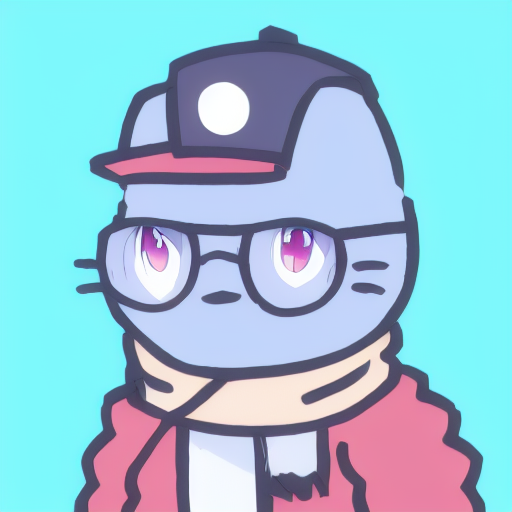

In [65]:
prompt = "turn it into anime"
generator = torch.Generator(device=device).manual_seed(122331121)
result_img = instruct(prompt, image=init_img, num_inference_steps=50, image_guidance_scale=1, generator=generator).images[0]
result_img

  0%|          | 0/50 [00:00<?, ?it/s]

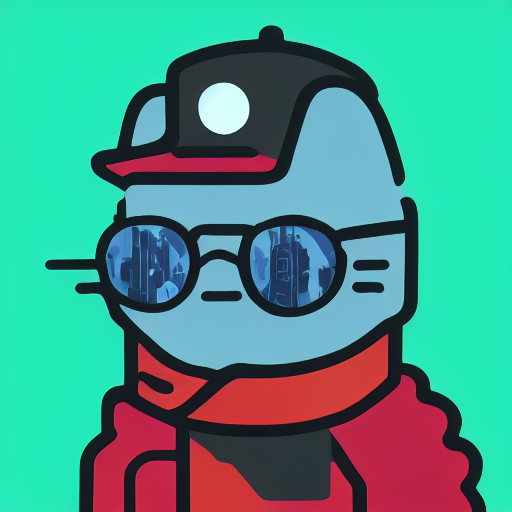

In [67]:
prompt = "make it Futuristic apocalyptic  "
generator = torch.Generator(device=device).manual_seed(122331121)
result_img = instruct(prompt, image=init_img, num_inference_steps=50, image_guidance_scale=1, generator=generator).images[0]
result_img

  0%|          | 0/50 [00:00<?, ?it/s]

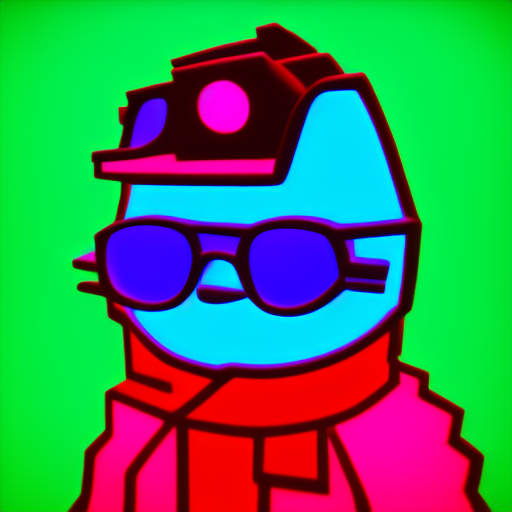

In [69]:
prompt = "Give it 3D  Glasses  "
generator = torch.Generator(device=device).manual_seed(122331121)
result_img = instruct(prompt, image=init_img, num_inference_steps=50, image_guidance_scale=1, generator=generator).images[0]
result_img